In [1]:
import numpy as np
import tensorflow as tf
from keras.models import load_model
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from skimage.io import imshow
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [2]:
model=load_model('./best_weights.hdf5')

test_datagen  = ImageDataGenerator(rescale = 1./255)

In [3]:
# Test Data 

test_dataset  = test_datagen.flow_from_directory(directory = '../Alzheimer_s Dataset/test',
                                                 target_size = (224,224),
                                                 class_mode = 'categorical',
                                                 batch_size = 128)

Found 1280 images belonging to 4 classes.


In [4]:
# Evaluating Loss and AUC

model.evaluate(test_dataset)

10/10 [==============================] - 134s 13s/step - loss: 1.3538 - auc: 0.8880


[1.3537700176239014, 0.8880111575126648]

In [5]:
def predict_img(path):
    dic = test_dataset.class_indices
    idc = {k:v for v, k in dic.items()}

    img = load_img(path, target_size = (224,224,3))
    img = img_to_array(img)
    img = img/255
    imshow(img)
    plt.axis('off')
    img = np.expand_dims(img,axis=0)
    answer = model.predict(img)
    classes_x=np.argmax(answer,axis=1)

    def predict_prob(number):
      return [number[0],1-number[0]]

    y_prob = np.array(list(map(predict_prob, model.predict(img))))

    probability = round(np.max(y_prob*100),2)

    print(probability,'% chances are there that the image is',idc[classes_x[0]])

100.0 % chances are there that the image is NonDemented


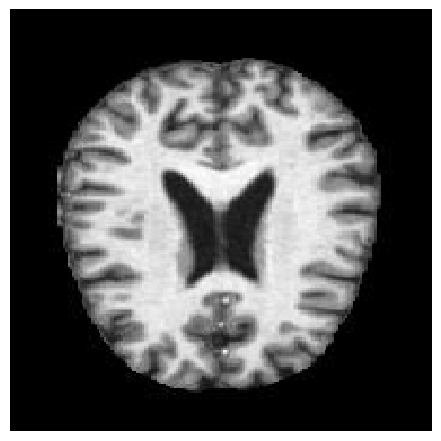

In [6]:
# Test Case 1: Non-Dementia

path='../Alzheimer_s Dataset/test/NonDemented/26 (100).jpg'

predict_img(path)

99.83 % chances are there that the image is MildDemented


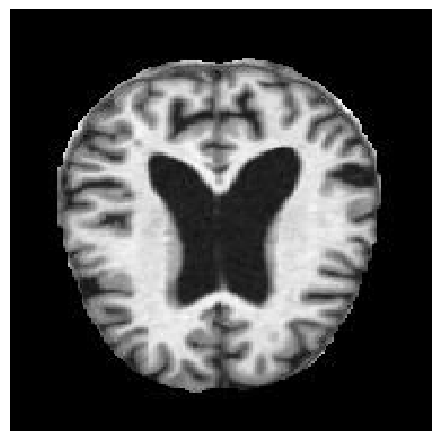

In [7]:
# Test Case 2: Mild Demented

path='../Alzheimer_s Dataset/test/MildDemented/26 (21).jpg'

predict_img(path)

82.4 % chances are there that the image is ModerateDemented


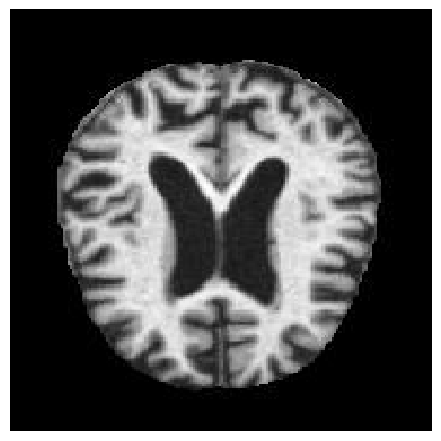

In [8]:
# Test Case 3: Moderate Demented

path='../Alzheimer_s Dataset/test/ModerateDemented/28 (2).jpg'

predict_img(path)

99.99 % chances are there that the image is VeryMildDemented


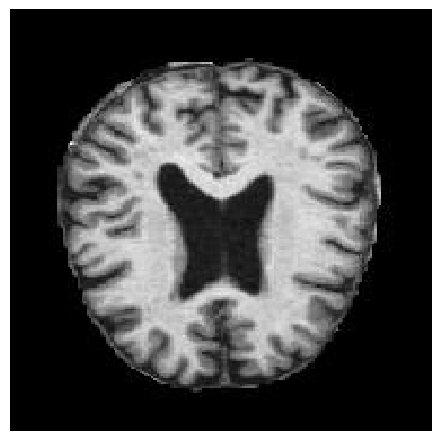

In [9]:
# Test Case 4: Very Mild Demented

path='../Alzheimer_s Dataset/test/VeryMildDemented/27 (67).jpg'

predict_img(path)